<a href="https://www.kaggle.com/code/wandererfakeer/09-merging-job-postings-for-top-5-jobs-in-india?scriptVersionId=190832709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [85]:
import pandas as pd

import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

#convert string date to datetime object
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

#add "job_posted_period" column as period
df["job_posted_period"] = df.job_posted_date.dt.to_period("M")

df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_period
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10


In [89]:
#get the data specific to India
india = df[df["job_country"] == "India"]

india.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_period
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",2023-06
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,NaN,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-04


In [90]:
#add "job_posted_month" column, extracting the full month name from period
india["job_posted_month"] = india["job_posted_period"].dt.strftime("%B")

/tmp/ipykernel_33/166047590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["job_posted_month"] = india["job_posted_period"].dt.strftime("%B")


In [91]:
#pivot by both "job_posted_period" and "job_posted_month" and "job_title_short"
india_pivot = india.pivot_table(index = ["job_posted_period", "job_posted_month"], columns = "job_title_short", aggfunc = "size")

india_pivot

,job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_period,job_posted_month,,,,,,,,,,
2023-01,January,175,31,628,2132,1444,70,127,448,269,192
2023-02,February,143,35,433,1631,932,42,94,313,165,157
2023-03,March,116,37,422,1591,1005,34,96,351,194,180
2023-04,April,170,32,418,1566,946,54,86,375,194,169
2023-05,May,103,14,278,1384,837,31,59,329,134,98
2023-06,June,146,26,367,1632,1129,41,66,427,238,125
2023-07,July,142,25,457,1528,1123,54,75,359,204,155
2023-08,August,189,25,618,1407,1157,47,126,343,235,148
2023-09,September,155,34,630,1508,984,67,85,324,195,132


In [92]:
#read csv data to create another dataframe
soft_jobs = pd.read_csv("https://lukeb.co/software_csv", index_col = "job_posted_month")

soft_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [93]:
#merge both dataframes, with common column "job_posted_month"
job_merged = india_pivot.merge(right = soft_jobs, on = "job_posted_month")

job_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094


In [94]:
#get the 5 most posted jobs
top_5_jobs = (
    job_merged.sum(). #find total number of each posted jobs
    sort_values(ascending = False).
    head().
    index. #get the job_title_short for the top 5 most posted jobs
    to_list()
)

top_5_jobs

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

In [95]:
top_5_jobs_by_months = job_merged[top_5_jobs]

top_5_jobs_by_months

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Data Engineer
job_posted_month,,,,,
January,13619,9827,5108,4348,2132
February,11456,9116,7298,4284,1631
March,11102,8178,5814,4159,1591
April,14037,9209,7232,4220,1566
May,12126,8864,6718,4980,1384
June,12003,8065,5902,4781,1632
July,11914,8061,6839,4344,1528
August,11571,8191,7413,4104,1407
September,14016,8447,6139,4094,1508


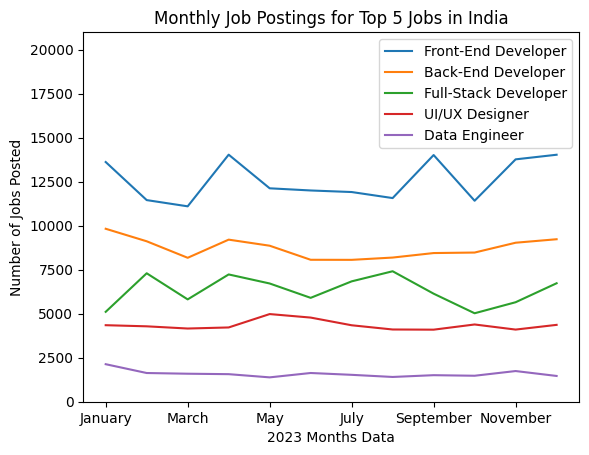

In [96]:
top_5_jobs_by_months.plot(kind = "line")

plt.title("Monthly Job Postings for Top 5 Jobs in India")

plt.xlabel("2023 Months Data")

plt.ylabel("Number of Jobs Posted")

plt.ylim(0, 21000)

plt.show()